In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
file_path = "C:\\Users\\jeleo\\Downloads\\happiness_score_dataset.csv"
df = pd.read_csv(file_path)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.isnull().head(50)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
for i in  df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [6]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [7]:

numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

print('\n')
object_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        object_col.append(i)
print("Object Columns: ", object_col)


Numerical Columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


Object Columns:  ['Country', 'Region']


In [8]:
# checking the uniqueness of the target variable 
df["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [9]:
#Dropping the Happiness Rank Column
df.drop(["Happiness Rank"], axis =1, inplace = True)

In [10]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Desciption of Dataset

In [11]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The mean is slightly higher than the median(50%) on the Happiness Score column, Trust column and Generosity. 
This means the Data is skewed to the right in these columns.

 Dystopia Residual most likely has a normal distribution 
  
While, the other columns Economy, Family, Health and Freedom Column  are skewed to the left because the median is greater than the mean. 

The is a little difference between the  75% and the max which indicates there might be  some  outliers 

In [12]:

new_df = df.rename(columns={'Trust (Government Corruption)': 'Trust', 'Health (Life Expectancy)': 'Health', 'Economy (GDP per Capita)': 'Economy'}, inplace=True)
new_df=  df.iloc[:, 2:]
new_df

,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


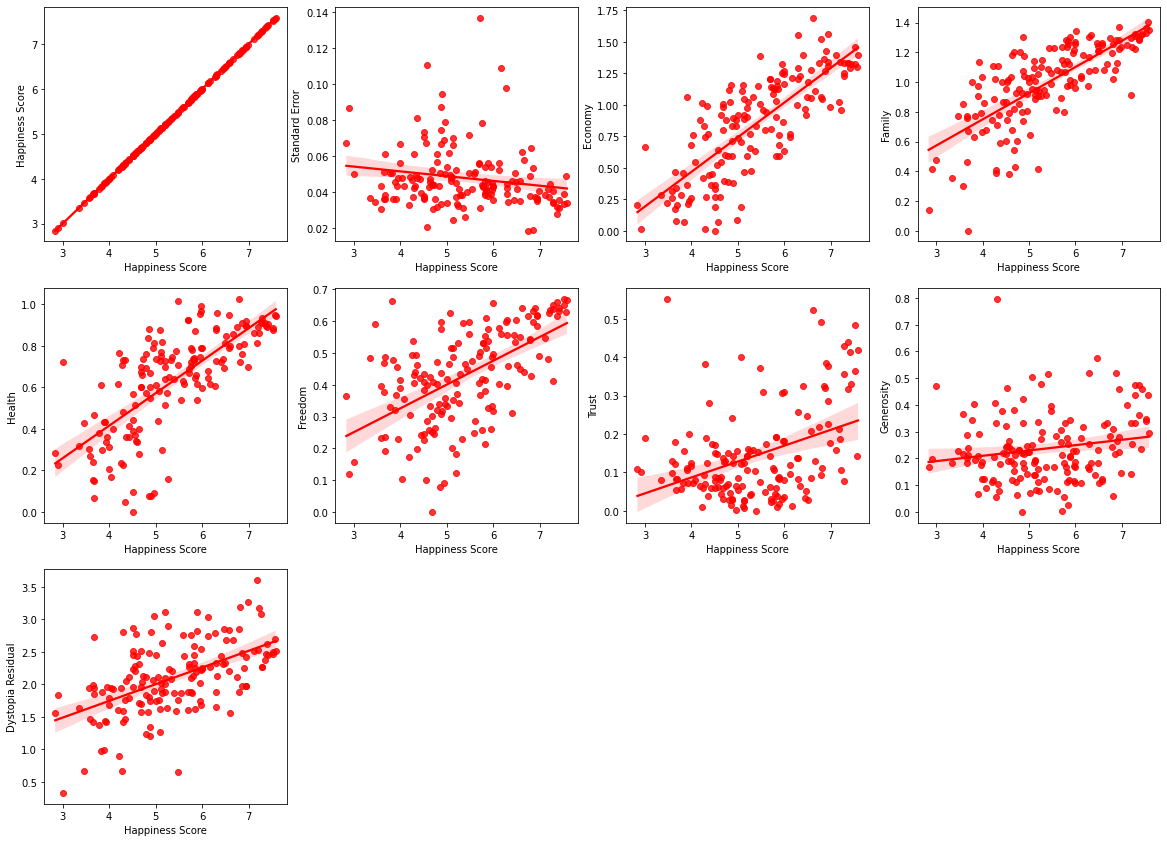

In [13]:


#Plot a linear graph to  determine the relationshipof the independent varaible  with the target Virable Happiness Score
plt.figure(figsize=(20,25))
p=1
for i in new_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.regplot(x='Happiness Score',y=i,data=new_df,color = 'r')
        plt.xlabel('Happiness Score')
        plt.ylabel(i)
    p+=1
    
plt.show()

The Happiness Score has a positive  relationship with the Health, Freedom, Economy, Family, Trust and Dystopia but its not a strong relationship 
While the rest columns are slightly negative 

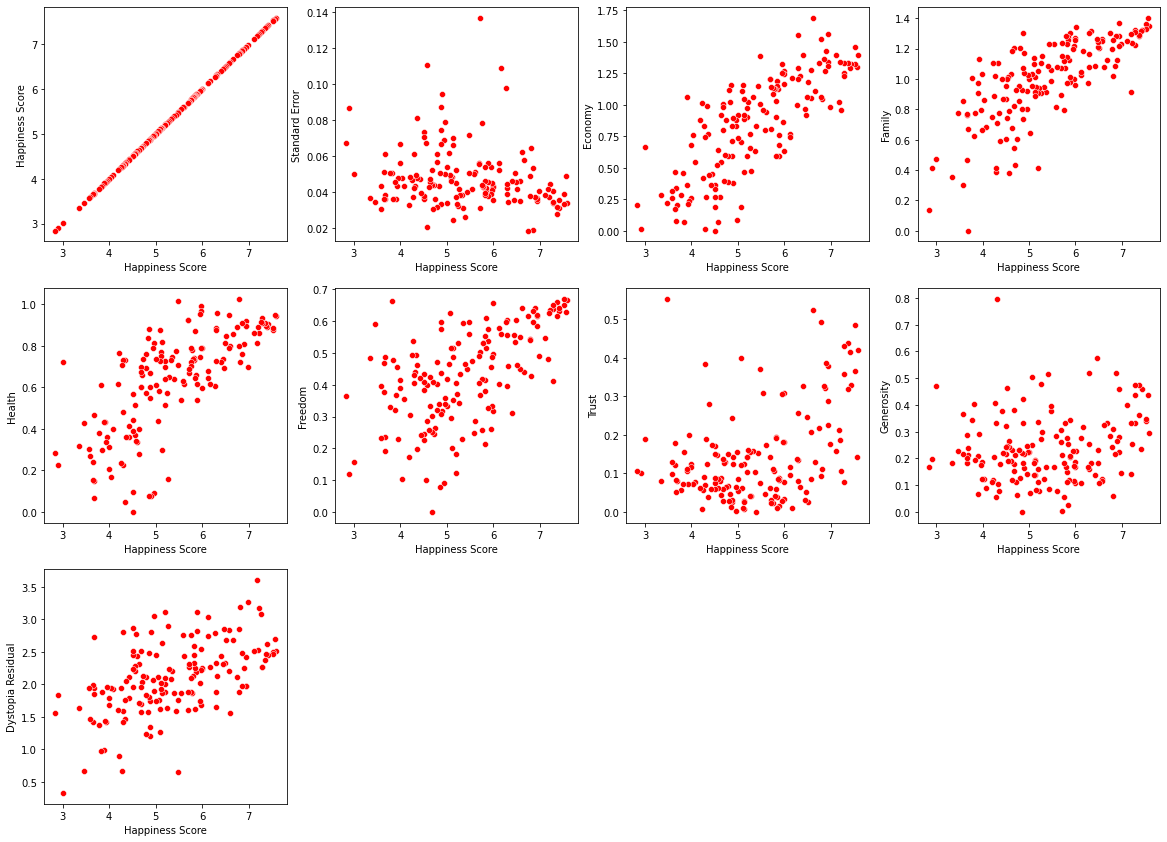

In [14]:
plt.figure(figsize=(20,25))
p=1
for i in new_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Happiness Score',y=i,data=new_df,color = 'r')
        plt.xlabel('Happiness Score')
        plt.ylabel(i)
    p+=1
    
plt.show()

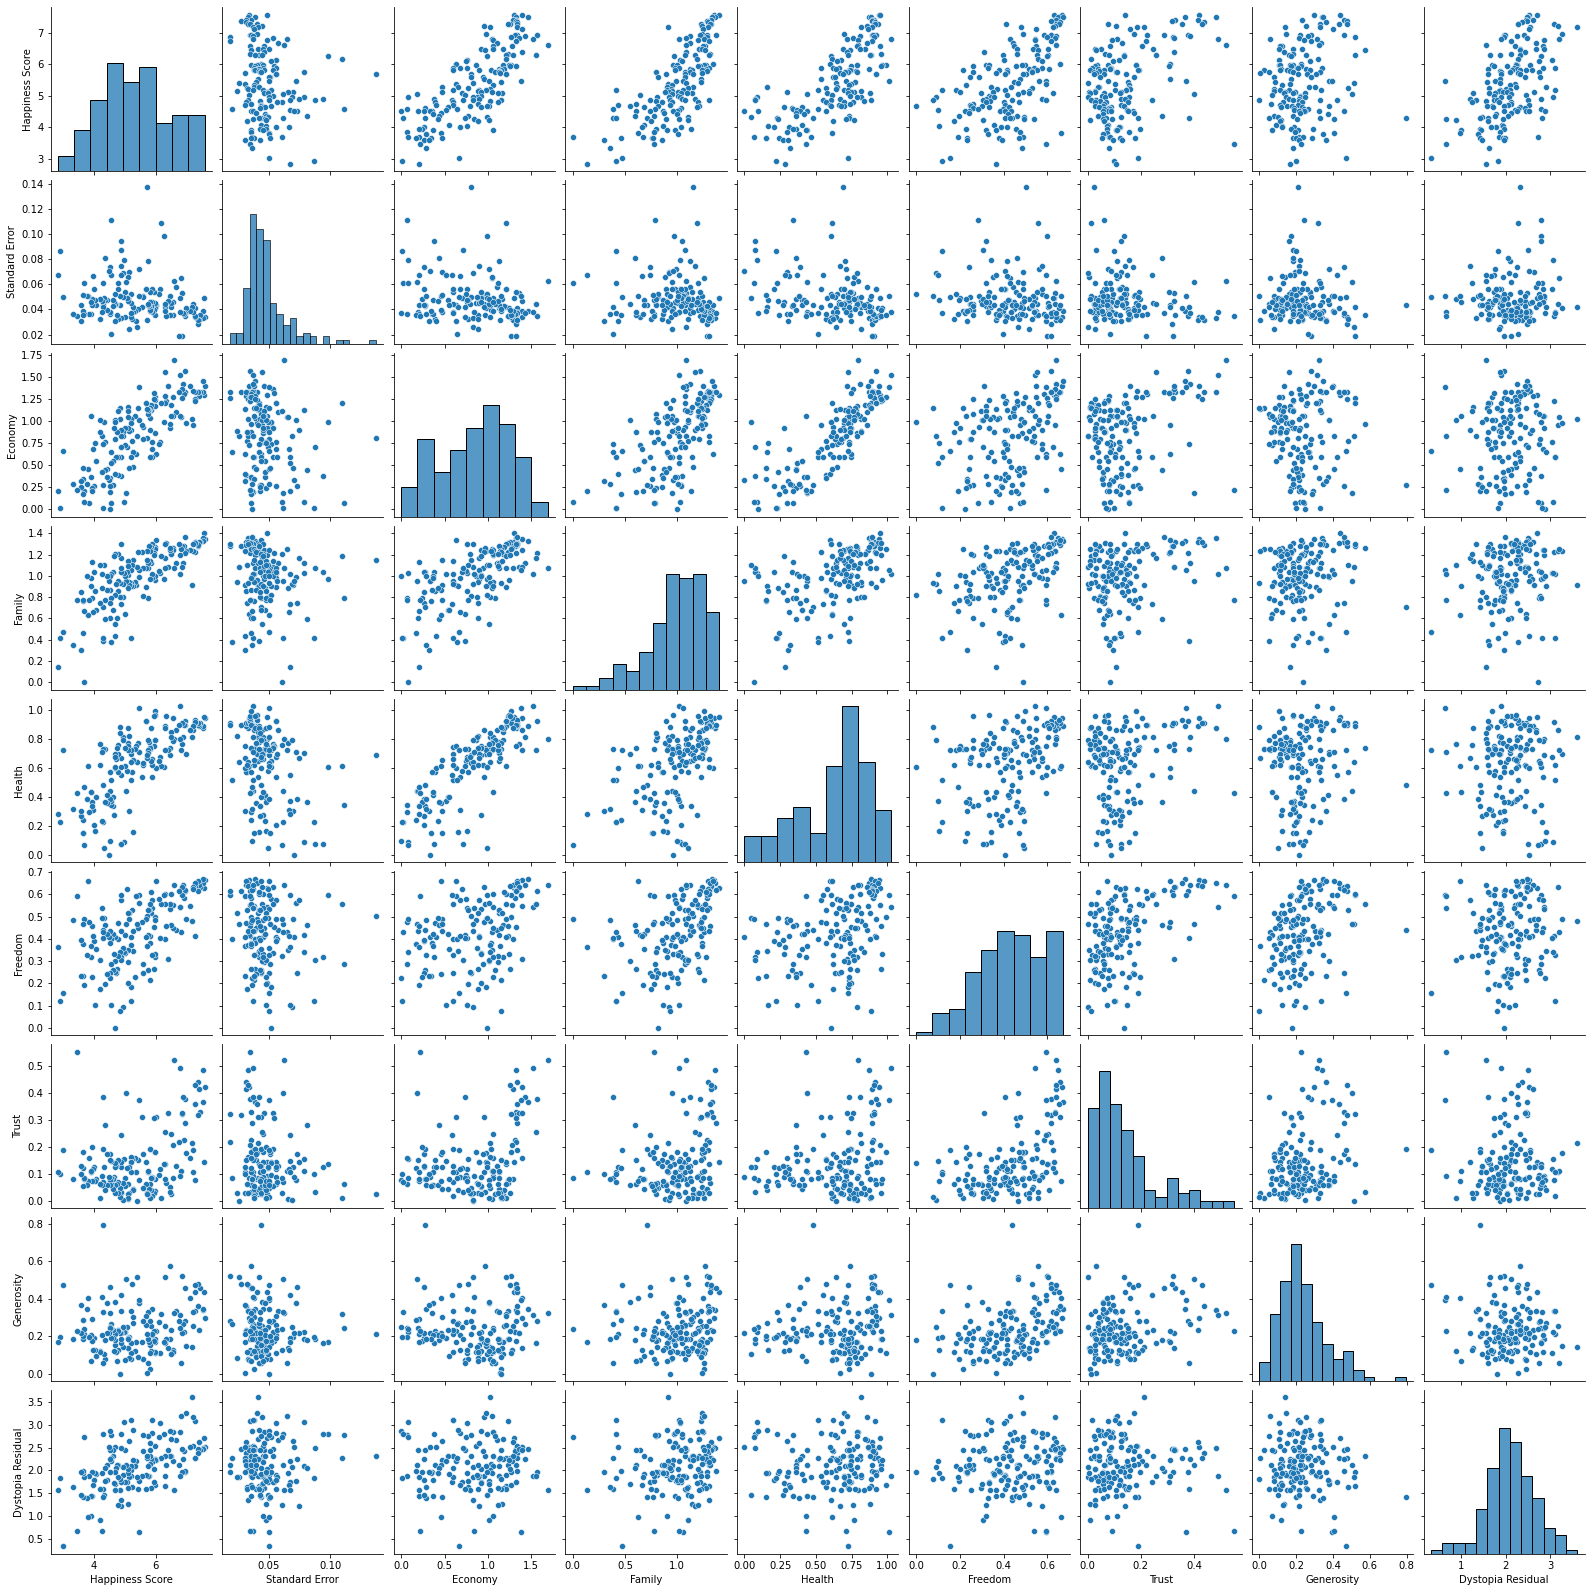

In [15]:
sns.pairplot(data=df,palette = 'Dark2')

Checking for Outliers

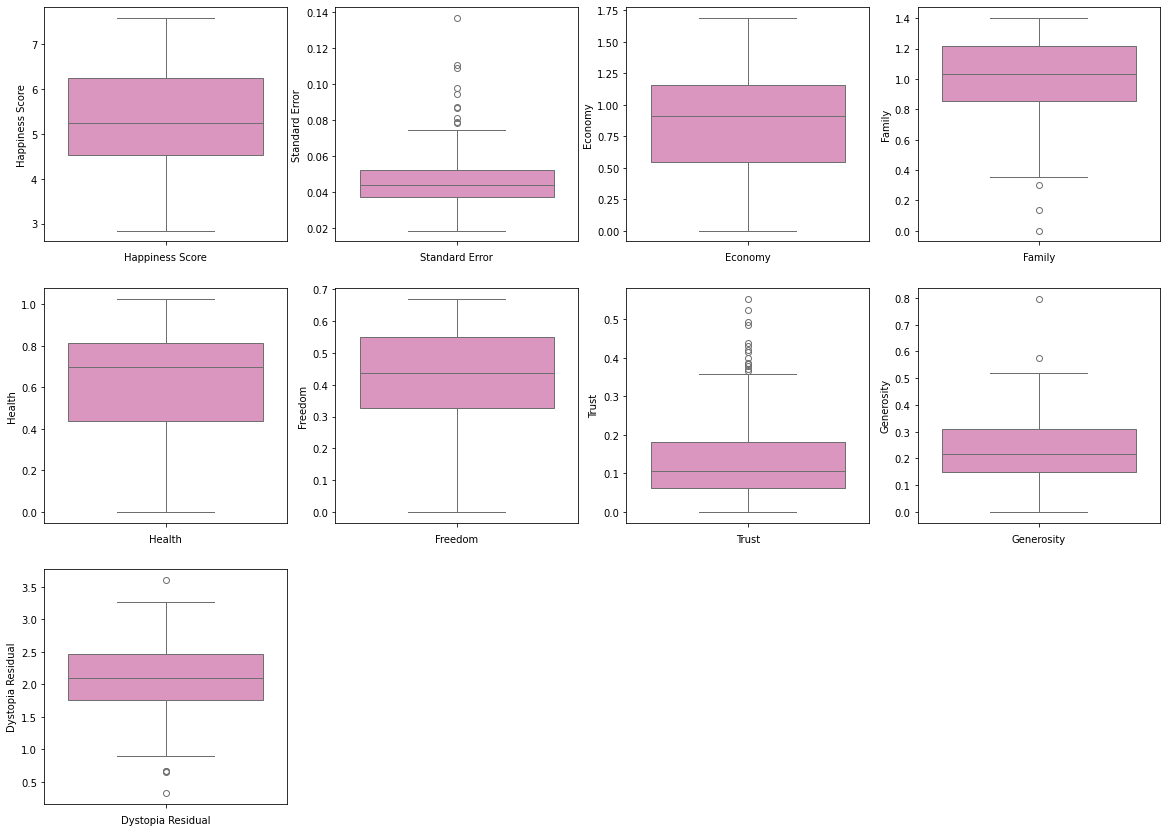

In [16]:

plt.figure(figsize= (20,25))
p=1
for i in new_df:
    if p<=18:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette = 'Set2_r')
        plt.xlabel(i)
    
    p+=1
    
plt.show()

The Boxplot shows that there are outliers present in Standard Error,Family, Generosity,Dystopia Residual, Trust Government, Dystopia Residual



Removing the Outliers

In [17]:
outliers_features = df[['Standard Error', 'Family','Trust', 'Generosity' , 'Dystopia Residual']]
z= np.abs(zscore(outliers_features))
z

,Standard Error,Family,Trust,Generosity,Dystopia Residual
0,0.805926,1.320281,2.309652,0.471040,0.758258
1,0.055889,1.514458,0.016480,1.575856,1.092857
2,0.854487,1.361054,2.842774,0.824293,0.712335
3,0.531526,1.251922,1.852081,0.868638,0.663893
4,0.722845,1.221204,1.555725,1.748563,0.639337
...,...,...,...,...,...
153,0.774917,0.800520,3.413922,0.087228,2.588925
154,0.662582,2.346860,0.529210,0.433117,0.843967
155,0.132534,1.901086,0.381419,1.856891,3.208430
156,2.263962,2.118467,0.357715,0.316950,0.481985


In [18]:
#threshold = 3
np.where(z>3)


(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([2, 0, 0, 0, 3, 1, 2, 4, 1], dtype=int64))

In [19]:
z.iloc[128,3]

4.423261580434631

In [20]:
new_df1 =new_df[(z<3).all(axis = 1)]
new_df1


,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [21]:
print("Old Data Frame- ", new_df.shape[0])
print ("New Data Frame- ", new_df1.shape[0])

Old Data Frame-  158
New Data Frame-  149


In [22]:
print("Data Loss Percentage- ", ((new_df.shape[0]-new_df1.shape[0])/new_df.shape[0])*100)

Data Loss Percentage-  5.69620253164557


check with IQR 

In [23]:
#1st quantile
Q1 = outliers_features.quantile(0.25)

#3rd quantile
Q3 = outliers_features.quantile(0.75)

#IQR
IQR =Q3-Q1


new_df2 = new_df[~((new_df<(Q1-1.5 * IQR)) |(new_df>(Q3 + 1.5*IQR))).any(axis=1)]
new_df2.shape

(126, 9)

In [24]:
print("Data Loss Percentage- ", ((new_df.shape[0]-new_df2.shape[0])/new_df.shape[0])*100)

Data Loss Percentage-  20.253164556962027


Z score has the least data  loss percentage  compare to IQR

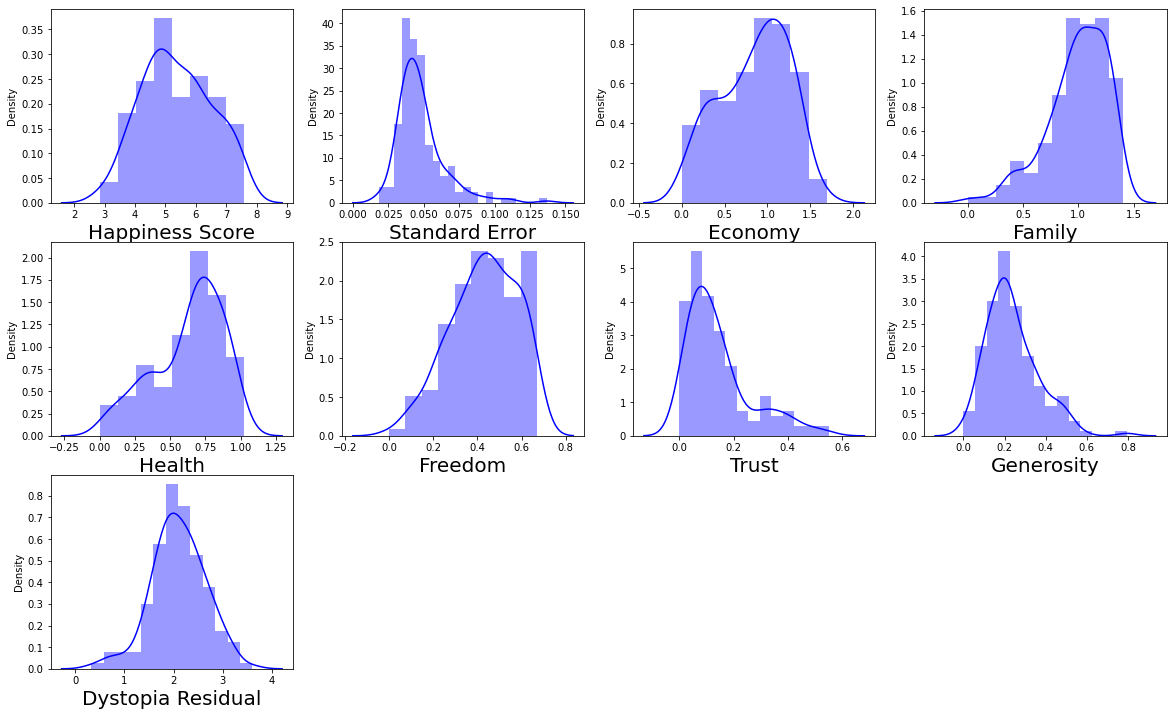

In [25]:
plt.figure(figsize= (20,25))
plotnumber = 1

for column in new_df:
    if plotnumber <=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()

 Dystopis Residual, Economy & Happiness Score  shows a  distribution that is a normal distribution curve

Standard Error and Trust shows a  distribution that is skewed to the right 

family appears to be skewed to the  left  

In [26]:
new_df.skew()

Happiness Score      0.097769
Standard Error       1.983439
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.385463
Generosity           1.001961
Dystopia Residual   -0.238911
dtype: float64

In [27]:
#Removing skewness using cuberoot method
new_df['Standard Error'] = np.cbrt(df['Standard Error'])
new_df['Trust'] = np.cbrt(df['Trust'])
new_df['Generosity'] = np.cbrt(df['Generosity'])
new_df.skew()



Happiness Score      0.097769
Standard Error       0.979748
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                0.011932
Generosity          -0.961079
Dystopia Residual   -0.238911
dtype: float64

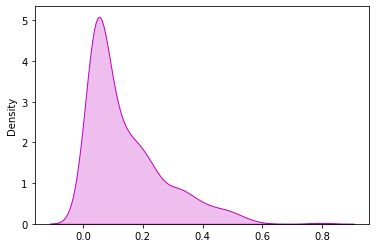

In [28]:

df_columns = ['Generosity', 'Trust', 'Standard Error']

# Create a distribution plot for the selected columns
sns.distplot(df[df_columns], color='m', kde_kws={"shade": True}, hist=False)

# Show the plot
plt.show()

In [29]:
#Determing the correlation 
new_df.corr()

,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
Happiness Score,1.000000,-0.201754,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029,0.530474
Standard Error,-0.201754,1.000000,-0.224064,-0.132005,-0.321062,-0.159027,-0.158530,-0.054081,0.063299
Economy,0.780966,-0.224064,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576,0.040059
Family,0.740605,-0.132005,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803,0.148117
Health,0.724200,-0.321062,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395,0.018979
Freedom,0.568211,-0.159027,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210,0.062783
Trust,0.326229,-0.158530,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991,0.010769
Generosity,0.159029,-0.054081,-0.059576,0.066803,0.044395,0.398210,0.266991,1.000000,-0.061511
Dystopia Residual,0.530474,0.063299,0.040059,0.148117,0.018979,0.062783,0.010769,-0.061511,1.000000


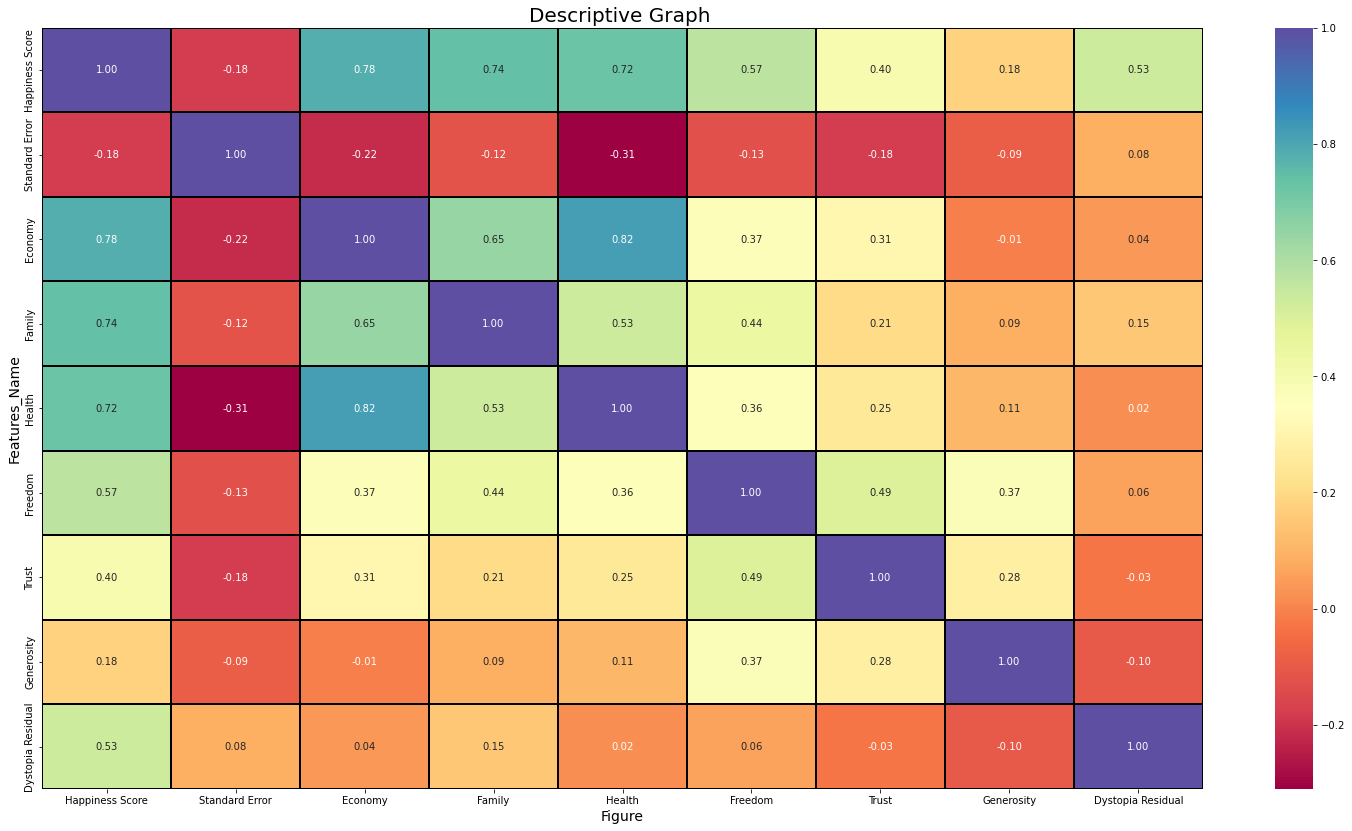

In [30]:
plt.figure(figsize = (26,14))
sns.heatmap(df.corr(),annot = True,fmt ='0.2f',linewidth=0.2,linecolor='black', cmap='Spectral')
plt.xlabel('Figure',fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph ',fontsize =20)
plt.show()

This heatmap contains both positive and negative correlation


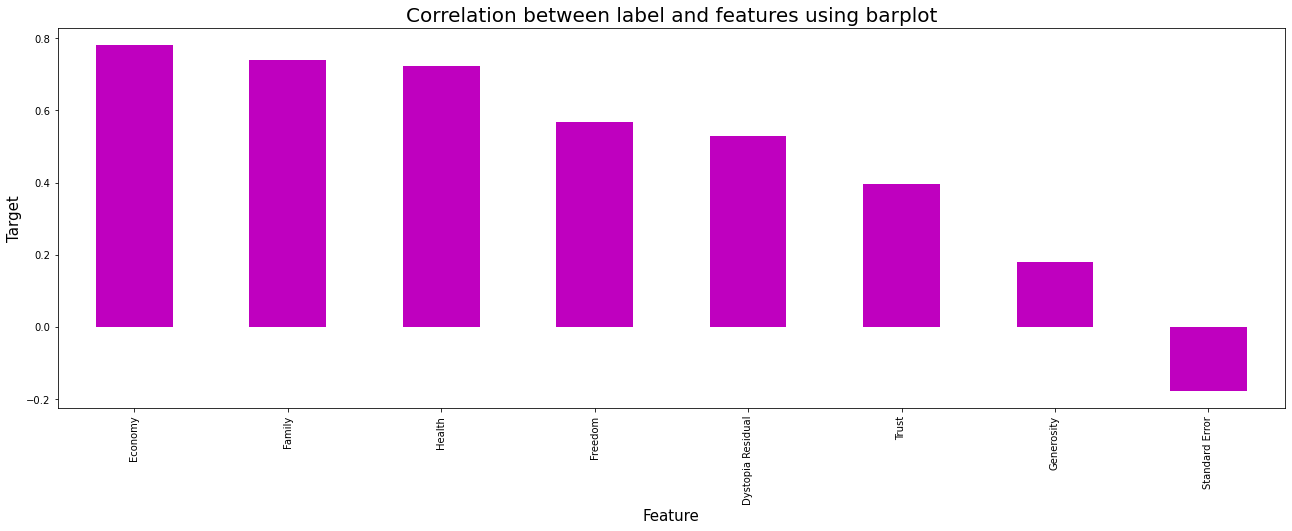

In [31]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending= False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot',fontsize=20)
plt.show()

This Bar chat shows a  strong positive Correlation  between Economy, Family and Health,


Medium correlation between Freedom , Dystopia Residual and Trust


Least correlation between Generosity and Standard Error


In [32]:
x= new_df1.drop("Happiness Score", axis=1)
y= new_df1["Happiness Score"]

print("Feature Dimension=", x.shape)
print("Label Dimension", y.shape)

Feature Dimension= (149, 8)
Label Dimension (149,)


In [33]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


In [34]:
# VIF for each scaled column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]= x.columns
vif

,VIF values,Features
0,1.168812,Standard Error
1,4.200848,Economy
2,1.930975,Family
3,3.427562,Health
4,1.861044,Freedom
5,1.470350,Trust
6,1.340286,Generosity
7,1.034747,Dystopia Residual


The Economy feature is high but it has an effect on the Happiness score

In [35]:
#Importing  Libary 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


first get the best random state

In [36]:
maxAccu =0 
maxRS = 0
for i in range(1,450):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS =i
print("Maximum r2 score is ", maxAccu," on Random_state ", maxRS)

Maximum r2 score is  0.9999999540741656  on Random_state  299


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.30, random_state = maxRS)

In [38]:
#Importing the Modelling libaries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR


In [39]:
# Define a list of models
models = [
    LinearRegression(),
    Lasso(),
    GradientBoostingRegressor(),
    Ridge(),
    DecisionTreeRegressor(),
    SVR(),
    ExtraTreesRegressor(),
]

# Iterate through the list of models
for model in models:
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(x_test)

    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Print the model's performance metrics
    print(f'Model: {type(model).__name__}')
    print('R2_score:', r2)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('\n')

Model: LinearRegression
R2_score: 0.9999999540741656
Mean Absolute Error: 0.00021190799399876977
Mean Squared Error: 6.55558979922589e-08
Root Mean Squared Error: 0.0002560388603166693


Model: Lasso
R2_score: -0.025050905842430193
Mean Absolute Error: 1.042573717948718
Mean Squared Error: 1.4631880632252632
Root Mean Squared Error: 1.2096231079246391


Model: GradientBoostingRegressor
R2_score: 0.9564949047446583
Mean Absolute Error: 0.2017766598544023
Mean Squared Error: 0.06210046321043812
Root Mean Squared Error: 0.2491996452855383


Model: Ridge
R2_score: 0.9999525867172303
Mean Absolute Error: 0.006959271910742713
Mean Squared Error: 6.767912597470594e-05
Root Mean Squared Error: 0.008226732399604714


Model: DecisionTreeRegressor
R2_score: 0.8197372935189424
Mean Absolute Error: 0.39335555555555557
Mean Squared Error: 0.25731233333333337
Root Mean Squared Error: 0.5072596310897738


Model: SVR
R2_score: 0.9583364585973144
Mean Absolute Error: 0.16914147671686347
Mean Squared Err

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
# Define a list of models
models = [
    LinearRegression(),
    Lasso(),
    GradientBoostingRegressor(),
    Ridge(),
    DecisionTreeRegressor(),
    SVR(),
    ExtraTreesRegressor(),
]

# Perform cross-validation for each model
for model in models:
    # Use cross_val_score to get scores for each fold
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')

    # Calculate R2 score on the test data
    model.fit(x_train, y_train)
    pred_model = model.predict(x_test)
    r2 = r2_score(y_test, pred_model)

    # Print the model's cross-validated performance
    print(f'Model: {type(model).__name__}')
    print('Cross-validated R2 score:', scores.mean())
    print("Difference between R2 score and cross-validation score is:", (r2 - scores.mean()) * 100)
    print('\n')

Model: LinearRegression
Cross-validated R2 score: 0.9999981234686345
Difference between R2 score and cross-validation score is: 0.00018306055311612113


Model: Lasso
Cross-validated R2 score: -23.099531692553747
Difference between R2 score and cross-validation score is: 2307.4480786711315


Model: GradientBoostingRegressor
Cross-validated R2 score: -2.3713820815704096
Difference between R2 score and cross-validation score is: 333.0993535171149


Model: Ridge
Cross-validated R2 score: 0.9984242986241231
Difference between R2 score and cross-validation score is: 0.1528288093107233


Model: DecisionTreeRegressor
Cross-validated R2 score: -7.885718505790936
Difference between R2 score and cross-validation score is: 869.3242922736056


Model: SVR
Cross-validated R2 score: -3.427599420198027
Difference between R2 score and cross-validation score is: 438.59358787953414


Model: ExtraTreesRegressor
Cross-validated R2 score: -3.0167184692550735
Difference between R2 score and cross-validation s

from the difference of both R2 score and cross validation score computed on R2 score we can conclude that  the Ridge  is  our best fitting and best performing mode

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param={'alpha': [1.0,0.05,.4,2],'fit_intercept': [True,False],
      'solver':['auto', 'svd','cholesky','lsqr','sag','saga','lbfgd'],
       'positive': [False, True],
       'random_state': [1,4,10,20]
     
      }
gscv= GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgd']})

In [44]:
gscv.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [45]:
Model= Ridge(alpha = 0.05, fit_intercept = True, positive = False , random_state =1, solver = 'lsqr')

In [46]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2_score: ', r2_score(y_test,pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.9999998053655281
Mean Absolute Error:  0.0004370970478945956
Mean Squared Error:  2.7782701751283787e-07
Root Mean Squared Error:  0.0005270929875390469


In [58]:


Model.fit(x_train, y_train)

# Make predictions on the test data
pred = Model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('R2_score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


R2_score: 0.9999998053655281
Mean Absolute Error: 0.0004370970478945956
Mean Squared Error: 2.7782701751283787e-07
Root Mean Squared Error: 0.0005270929875390469


In [59]:
import joblib
import pickle


In [60]:
joblib.dump(Model, "Happiness_Score_Analysis.pk1")

['Happiness_Score_Analysis.pk1']

In [61]:
#lets load the saved model and get the predictions
final_model = joblib.load("Happiness_Score_Analysis.pk1")

#prediction
prediction = Model.predict(x_test)
prediction

array([4.43579632, 6.74999946, 5.4743049 , 4.86650439, 3.8201291 ,
       4.67713116, 3.34076174, 5.19260693, 7.52162726, 4.83949353,
       3.66746239, 6.30227363, 4.78701095, 5.12875113, 7.3633361 ,
       7.56020335, 5.47692157, 4.33196426, 4.51487949, 5.26727847,
       3.90456826, 4.87626784, 6.66916487, 6.48507883, 5.14095749,
       4.07714275, 7.28362187, 5.97533976, 6.57507993, 4.7883984 ,
       5.07367883, 3.95622354, 5.19318442, 7.2253067 , 4.56474918,
       5.85504554, 6.00310451, 5.21206844, 4.2925062 , 6.5047686 ,
       7.4263743 , 4.03280363, 3.68156932, 4.69431974, 3.58762206])

In [62]:
happiness_score= np.array(y_test)
df = pd.DataFrame()
df["Predicted"]= prediction
df["Original"] = happiness_score
df

,Predicted,Original
0,4.435796,4.436
1,6.749999,6.750
2,5.474305,5.474
3,4.866504,4.867
4,3.820129,3.819
5,4.677131,4.677
6,3.340762,3.340
7,5.192607,5.192
8,7.521627,7.522
9,4.839494,4.839


# Titanic survived Project


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install imblearn
from imblearn.over_sampling import SMOTE


In [64]:
file_path = "C:\\Users\\jeleo\\Downloads\\titanic_train.csv"
df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
#Checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows there are null values present in Age, Cabin and Embarked Column

In [67]:
for i in  df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [68]:
# replace the null values in the age column with the mean
np.mean(df["Age"])

29.69911764705882

In [69]:
#filling null values in Age with its mean
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [70]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
#Creating a new Datafram to remove the Cabin and Embarked column without dropping the data from the original dataset
new_df=  df.iloc[:, :10]
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


In [72]:
categorical_col =[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in new_df.dtypes.index:
    if new_df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['Name', 'Sex', 'Ticket']


Numerical Columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [73]:
#Dropping the PassengerId Column
new_df.drop(["PassengerId"], axis =1, inplace = True)



In [74]:
# checking the uniqueness of the target variable 
new_df["Survived"].unique()

array([0, 1], dtype=int64)

In [75]:
new_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

The 0 indicate 'No' Surviver and the 1 indicate 'Yes' to the surviver

This Shows  less people survived the titanic sinking 

In [76]:
#Statistical summary of  the Dataset
new_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the numerical columns. The summary of the dataset looks good as  there is no negative/ invalid values present

From the above description we can observe the following :

1. The counts of all the columns are the same which means there are no missing values in the dataset

2. The mean value is less than the median(50%) in the Pclass columns which means the data is skewed to left in these column

3. The data in the columns Survived,SibSp,Parch,Fare have mean value greater than median which means the data is skewed to right.

4. The Age columns has a normal distribution 

5. By summarizing the data we can observe there is a huge differences between 75% and max  in th Age Column, SibSp, Parch, and Fare indicating there are outliers present into the data

6. The standard deviation, min, 25% percentile values are present from this describe method

0    549
1    342
Name: Survived, dtype: int64


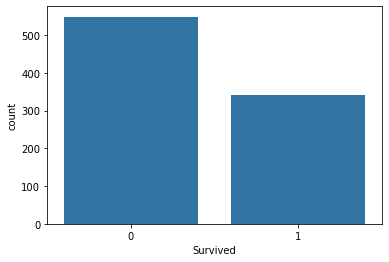

In [77]:
#Visualize the number of passengers
ax = sns.countplot(x="Survived",data=new_df)
print(new_df['Survived'].value_counts())

We observe that the passesgers who did not survive are more ('0') than the ones who survived ('1').This can lead to data imbalance

male      577
female    314
Name: Sex, dtype: int64


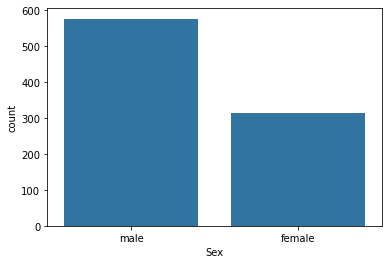

In [78]:
#Visualising the count of Gender
print(new_df["Sex"].value_counts())
ax = sns.countplot(x="Sex", data=new_df)
plt.show()

This shows there are more male passengers than female. 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


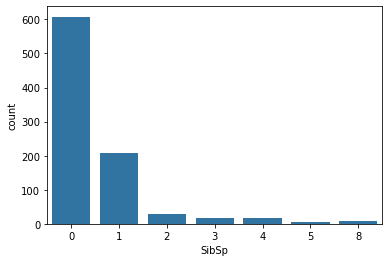

In [79]:
print(new_df["SibSp"].value_counts())

ax = sns.countplot(x='SibSp',data=new_df)
plt.show()

Number of passenger without a  Siblings/Spouses Aboard are highest in the ship 

In terms of passengers with  Siblings/Spouses Aboard , the ones with atleast one sibling are more on the ship than the rest with more than one

 

3    491
1    216
2    184
Name: Pclass, dtype: int64


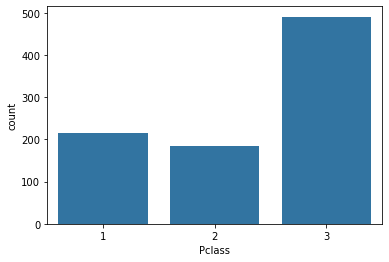

In [80]:
print(new_df["Pclass"].value_counts())

ax = sns.countplot(x='Pclass',data=new_df)

plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


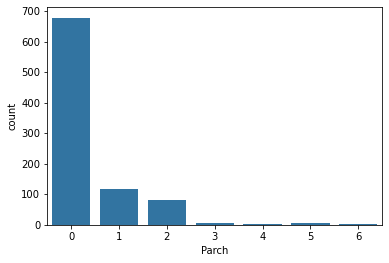

In [81]:
print(new_df["Parch"].value_counts())

ax = sns.countplot(x='Parch',data=new_df)
plt.show()

Bivariate Analysis

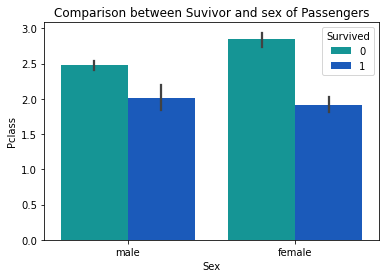

In [82]:
plt.title("Comparison between Suvivor and sex of Passengers")
sns.barplot(x= "Sex", y= "Pclass", data=df,palette= "winter_r", hue = "Survived")
plt.show()

<AxesSubplot:title={'center':'comparison between Age and Sibling/Spouse Abroad'}, xlabel='SibSp', ylabel='Age'>

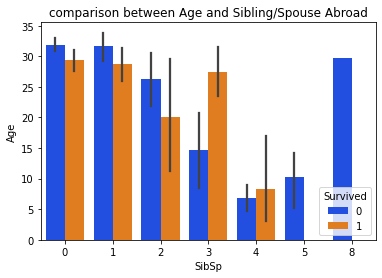

In [83]:

plt.title("comparison between Age and Sibling/Spouse Abroad")
sns.barplot(x="SibSp",y= "Age",data=new_df,hue="Survived", palette = "bright")

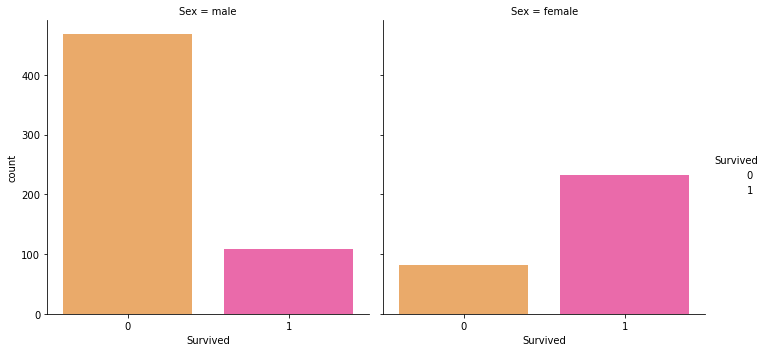

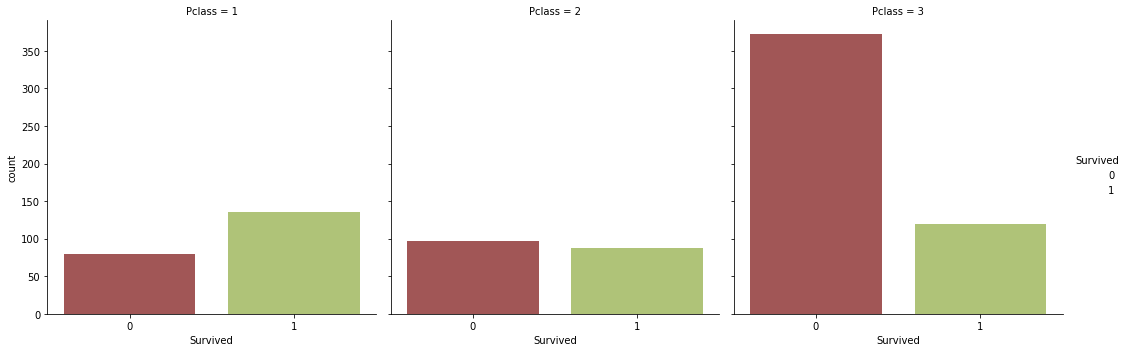

In [84]:
#Checking Survivor Rate and gender
sns.catplot(x='Survived',col='Sex',data=df,kind='count',palette ="spring_r")

#checking Survivor rate and  the class
sns.catplot(x= 'Survived',col = 'Pclass', data = df , palette ='tab20b_r',kind= "count")

plt.show()

From the Graph above 
1. Passengers around the age of 30 and above tend not to survive the sink 

2. The number of Survived passenger are the female gender compare to the male gender

3. The Passengers in Pclass 3 tend not to survive the sink  more  compared to passengers in Pclass one 

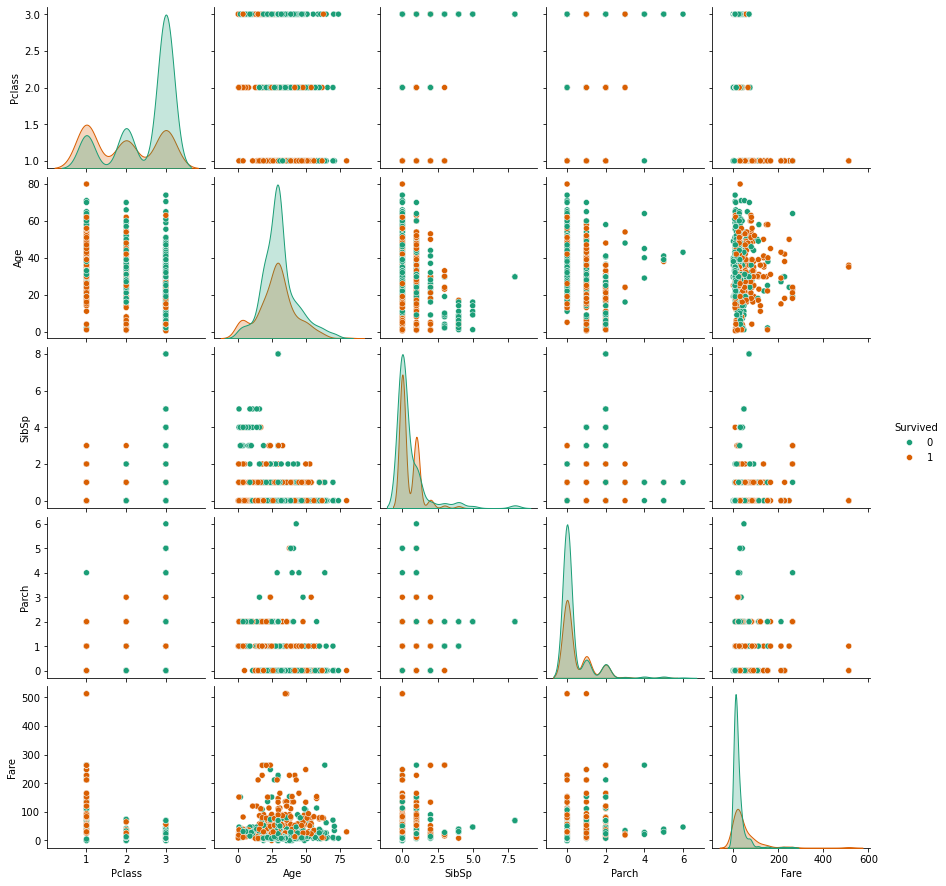

In [85]:
# Multivariate Analysis
sns.pairplot(new_df,hue= 'Survived', palette = 'Dark2')
plt.show()

The are no visible linear relationship

# Checking the Outliers

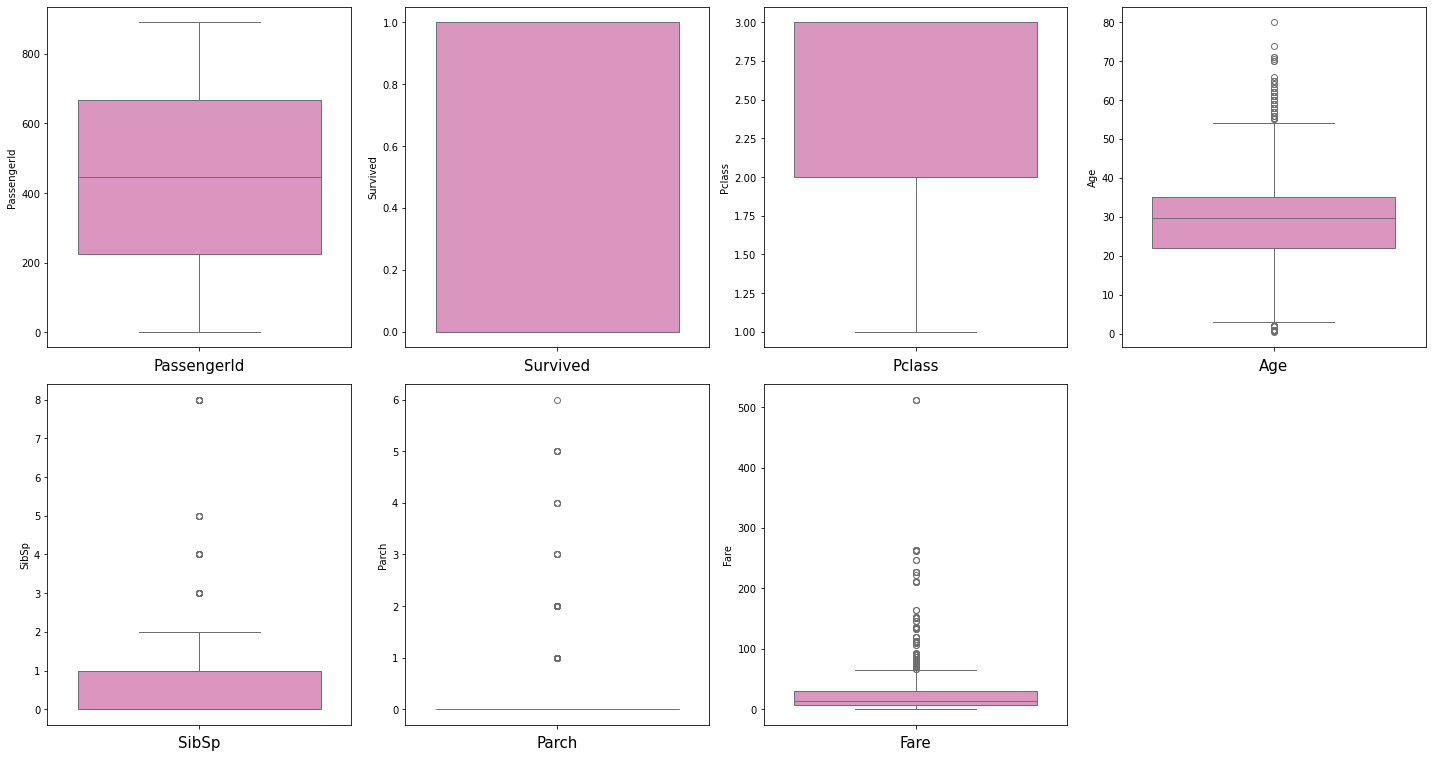

In [86]:



plt.figure(figsize = (20,26), facecolor = 'white')
p =1
for col in numerical_col:
    if p<=19:
        ax = plt.subplot(5, 4, p)
        sns.boxplot(df[col], palette = 'Set2_r')
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    p +=1
plt.tight_layout()



#plt.figure(figsize= (20,25))
#p=1
#for i in new_df:
   # if p<=18:
   #     plt.subplot(5,4,p)
   #     sns.boxplot(df[i],palette = 'Set2_r')
   #     plt.xlabel(i)
    
  #  p+=1
    
plt.show()



The above Boxplot  indicates there are some outliers in the Age, SibSp, Parch and  Fare. This means the outliers will need to be removed 


In [87]:
#Removing Outliers using z score and IQR
outliers_features = df[['Age', 'SibSp','Parch', 'Fare']]
z= np.abs(zscore(outliers_features))
z

,Age,SibSp,Parch,Fare
0,0.592481,0.432793,0.473674,0.502445
1,0.638789,0.432793,0.473674,0.786845
2,0.284663,0.474545,0.473674,0.488854
3,0.407926,0.432793,0.473674,0.420730
4,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.207709,0.474545,0.473674,0.386671
887,0.823344,0.474545,0.473674,0.044381
888,0.000000,0.432793,2.008933,0.176263
889,0.284663,0.474545,0.473674,0.044381


In [88]:
#threshold = 4
np.where(z>4)

(array([ 13,  25,  27,  59,  71,  88, 118, 159, 167, 180, 201, 258, 299,
        311, 324, 341, 360, 386, 438, 438, 480, 567, 610, 638, 678, 679,
        683, 737, 742, 792, 846, 863, 885], dtype=int64),
 array([2, 2, 3, 1, 1, 3, 3, 1, 2, 1, 1, 3, 3, 3, 1, 3, 2, 1, 2, 3, 1, 2,
        2, 2, 2, 3, 1, 3, 3, 1, 1, 1, 2], dtype=int64))

In [89]:
z.iloc[27,3]

4.647001076532463

In [90]:
new_df1 =new_df[(z<4).all(axis = 1)]
new_df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000


In [91]:
print("Old Data Frame- ", new_df.shape[0])
print ("New Data Frame- ", new_df1.shape[0])

Old Data Frame-  891
New Data Frame-  859


In [92]:
print("Data Loss Percentage: ", ((new_df.shape[0]-new_df1.shape[0])/new_df.shape[0])*100)

Data Loss Percentage:  3.5914702581369253


In [93]:
#1st quantile
Q1 = outliers_features.quantile(0.25)

#3rd quantile
Q3 = outliers_features.quantile(0.75)

#IQR
IQR =Q3-Q1


new_df2 = new_df[~((new_df<(Q1-1.5 * IQR)) |(new_df>(Q3 + 1.5*IQR))).any(axis=1)]
new_df2.shape

(577, 9)

In [94]:
print("Data Loss Percentage: ", ((new_df.shape[0]-new_df2.shape[0])/new_df.shape[0])*100)

Data Loss Percentage:  35.24130190796858


Z score has the least data loss percentage compare to IQR

In [95]:
new_df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [96]:
#Remove Skewedness
new_df['SibSp'] = np.cbrt(df['SibSp'])
new_df['Parch'] = np.cbrt(df['Parch'])
new_df['Fare'] = np.cbrt(df['Fare'])

In [97]:
new_df.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       1.033059
Parch       1.348334
Fare        1.230382
dtype: float64

In [98]:
#Encoding the Category Columns
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i] = OE.fit_transform(new_df[i].values.reshape(-1,1))
        
new_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,108.0,1.0,22.000000,1.0,0.000000,523.0,1.935438
1,1,1,190.0,0.0,38.000000,1.0,0.000000,596.0,4.146318
2,1,3,353.0,0.0,26.000000,0.0,0.000000,669.0,1.993730
3,1,1,272.0,0.0,35.000000,1.0,0.000000,49.0,3.758647
4,0,3,15.0,1.0,35.000000,0.0,0.000000,472.0,2.004158
...,...,...,...,...,...,...,...,...,...
886,0,2,548.0,1.0,27.000000,0.0,0.000000,101.0,2.351335
887,1,1,303.0,0.0,19.000000,0.0,0.000000,14.0,3.107233
888,0,3,413.0,0.0,29.699118,1.0,1.259921,675.0,2.862294
889,1,1,81.0,1.0,26.000000,0.0,0.000000,8.0,3.107233


In [99]:
cor = new_df.corr()
cor

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,0.071084,0.132108,-0.164549,0.322398
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.331339,-0.023812,-0.014490,0.319869,-0.656224
Name,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.075895,-0.047350,0.047348,-0.058390
Sex,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.187753,-0.255950,0.059372,-0.251434
Age,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.197664,-0.249280,-0.068848,0.105195
SibSp,0.071084,-0.023812,-0.075895,-0.187753,-0.197664,1.000000,0.465046,0.023042,0.349549
Parch,0.132108,-0.014490,-0.047350,-0.255950,-0.249280,0.465046,1.000000,0.002787,0.342465
Ticket,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.023042,0.002787,1.000000,-0.085046
Fare,0.322398,-0.656224,-0.058390,-0.251434,0.105195,0.349549,0.342465,-0.085046,1.000000


There is a presence of negative and positive correlation  amongs the columns 

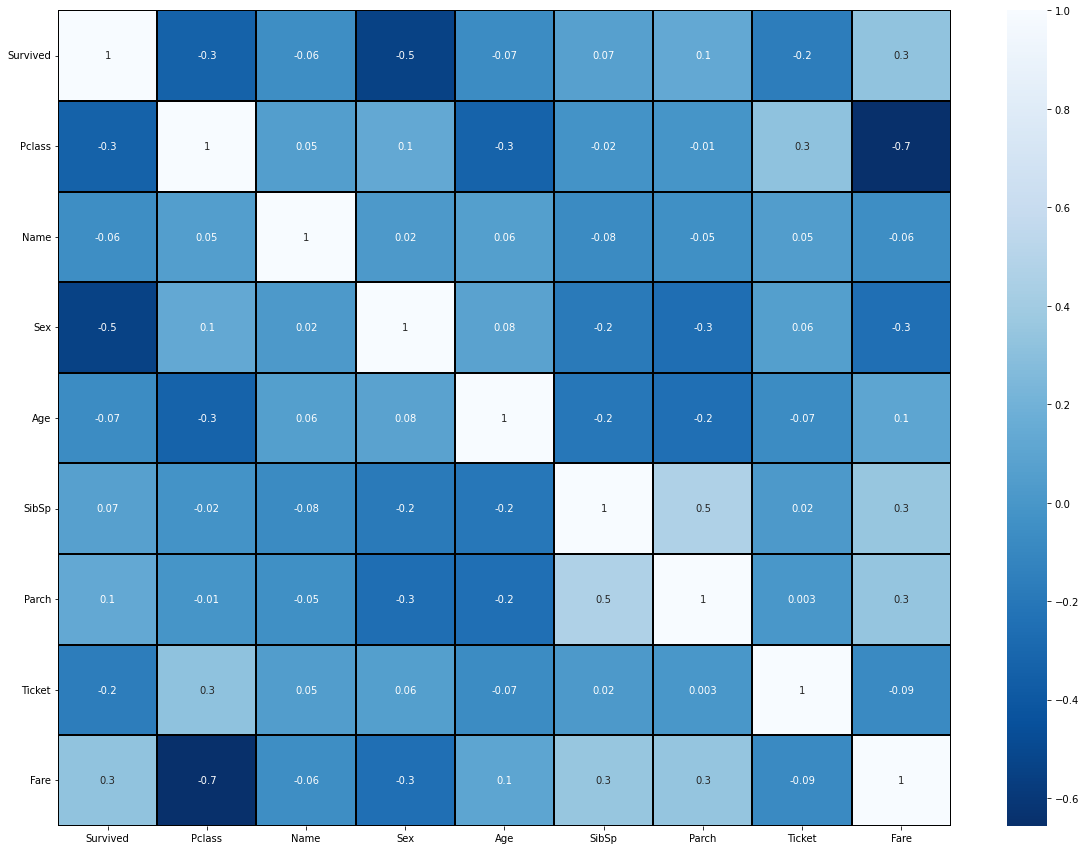

In [100]:
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths = 0.1, fmt=".1g", linecolor ="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [101]:
# Drop the survivied columns
x= new_df.drop("Survived", axis =1)
y= new_df["Survived"]

In [102]:
#Overcome the issue of biasness 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0.827377,-1.310217,0.737695,-0.592481,1.187523,-0.551654,0.918966,-0.774708
1,-1.566107,-0.991410,-1.355574,0.638789,1.187523,-0.551654,1.282625,1.287903
2,0.827377,-0.357685,-1.355574,-0.284663,-0.660582,-0.551654,1.646283,-0.720325
3,-1.566107,-0.672604,-1.355574,0.407926,1.187523,-0.551654,-1.442322,0.926230
4,0.827377,-1.671790,0.737695,0.407926,-0.660582,-0.551654,0.664904,-0.710596
...,...,...,...,...,...,...,...,...
886,-0.369365,0.400452,0.737695,-0.207709,-0.660582,-0.551654,-1.183277,-0.386703
887,-1.566107,-0.552079,-1.355574,-0.823344,-0.660582,-0.551654,-1.616678,0.318502
888,0.827377,-0.124412,-1.355574,0.000000,1.187523,1.999751,1.676173,0.089990
889,-1.566107,-1.415189,0.737695,-0.284663,-0.660582,-0.551654,-1.646568,0.318502


In [103]:
#Check for the VIF (Variance Inflation Factor(VIF))
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,2.472128,Pclass
1,1.013793,Name
2,1.114832,Sex
3,1.238777,Age
4,1.422215,SibSp
5,1.481310,Parch
6,1.163262,Ticket
7,2.516870,Fare


It can be observed that all the features are less than 10 . there will be no need to drop a column

In [104]:
#Oversampling the data 
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [105]:
#Check the count of the value  data 
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size =0.30, random_state = i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i 
print("Best accuracy is ", maxAccu, "at random_state", maxRs)

Best accuracy is  0.8848484848484849 at random_state 56


In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = maxRS)

# Modelling

In [108]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [109]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    AdaBoostClassifier(),
    BaggingClassifier(),
]


# Iterate through the list of models
for model in models:
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(x_test)
    
    

    
    # Evaluate the model
    accu_score = accuracy_score(y_test, predictions)
    conf_matrix= confusion_matrix(y_test, predictions)
    class_report= classification_report(y_test, predictions)
    
    
    # Print the model's performance metrics
    print(f'Model: {type(model).__name__}')
    print('accuracy_score:', accu_score)
    print('confusion_matrix:', conf_matrix)
    print('classification_report:', class_report)
    print('\n')
   

Model: RandomForestClassifier
accuracy_score: 0.832089552238806
confusion_matrix: [[150  18]
 [ 27  73]]
classification_report:               precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.80      0.73      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



Model: LogisticRegression
accuracy_score: 0.8059701492537313
confusion_matrix: [[141  27]
 [ 25  75]]
classification_report:               precision    recall  f1-score   support

           0       0.85      0.84      0.84       168
           1       0.74      0.75      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



Model: ExtraTreesClassifier
accuracy_score: 0.8171641791044776
confusion_matrix: [[146  2

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    AdaBoostClassifier(),
    BaggingClassifier(),
]


# Perform cross-validation for each model
for model in models:
    # Use cross_val_score to get scores for each fold
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    

    # Calculate Accuracy score on the test data
    model.fit(x_train, y_train)
    pred_model = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred_model)
    
    
    # Print the model's cross-validated performance
    print(f'Model: {type(model).__name__}')
    print('Cross-validated accuracy score:', scores.mean())
    print("Difference between Accuracy score and cross  validation score is:  ", accuracy_score(y_test, pred_model)- scores.mean())
    print('\n')
    
   


Model: RandomForestClassifier
Cross-validated accuracy score: 0.8373109032703534
Difference between Accuracy score and cross  validation score is:   -0.0052213510315474165


Model: LogisticRegression
Cross-validated accuracy score: 0.7934906785512523
Difference between Accuracy score and cross  validation score is:   0.012479470702479012


Model: ExtraTreesClassifier
Cross-validated accuracy score: 0.8114556525014123
Difference between Accuracy score and cross  validation score is:   0.0019771833194832666


Model: GradientBoostingClassifier
Cross-validated accuracy score: 0.8260686711443098
Difference between Accuracy score and cross  validation score is:   -0.01263583532341428


Model: SVC
Cross-validated accuracy score: 0.8193145439708746
Difference between Accuracy score and cross  validation score is:   -0.013344394717143215


Model: AdaBoostClassifier
Cross-validated accuracy score: 0.8159437574540205
Difference between Accuracy score and cross  validation score is:   -0.002510921

From the above cross valuation RandomForest Classifier shows the best fit 

In [112]:
# Create a Hyper parameter Turning 
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
             'random_state': [10,50,1000],
             'max_depth': [0 , 10, 20],
             'n_jobs': [-2,-1,1],
             'n_estimators': [50,100,200,300]}

In [113]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [114]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [115]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [116]:
Model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100, n_jobs = -2 , random_state = 1000)
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

83.2089552238806


In [117]:
#Saving the model
import joblib
joblib.dump(Model, "Titanic_survivor_Analysis.pk1")

['Titanic_survivor_Analysis.pk1']

In [118]:
model = joblib.load("Titanic_survivor_Analysis.pk1")

#prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [119]:
survived_sink= np.array(y_test)
df = pd.DataFrame()
df["Predicted"]= prediction
df["Original"] = survived_sink
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
263,0,0
264,0,0
265,0,0
266,1,1
